# Portuguese Bank Project
#### https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set
___

# テーブルコンテンツ

1. **[プロジェクト概要](#1)**
2. **[データクリーニング](#2)**
3. **[探索的データ解析](#3)**
4. **[特徴量エンジニアリング](#4)**
5. **[機械学習](#5)**
6. **[結果、まとめ](#6)**

# 1, プロジェクト概要 <a id="1"></a>

"Portuguese Bank Project"はポルトガル銀行の電話によるダイレクトマーケティングキャンペーンに関するプロジェクトです。
ポルトガル銀行はどのような特徴のある顧客に電話をかけたら定期預金をして貰えるかが知りたいのです。
このプロジェクトの目標は顧客リストの中から誰が定期預金をしているかを予想する事です。

このプロジェクトで用意されている顧客データの特徴量

- age: 年齢
- job: 職業　(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: 配偶者の有無　(categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: 学歴　(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: 過去にローンの支払いの遅れなどの不履行の有無 (categorical: 'no','yes','unknown')
- balance:  口座残高
- housing: 住宅ローンの有無 (categorical: 'no','yes','unknown')
- loan: 個人ローンの有無 (categorical: 'no','yes','unknown')

- contact: 連絡手段 (categorical: 'cellular','telephone')
- day: 前回このキャンペーンで連絡を取った日 (categorical: 1 ~ 31)
- month: 前回このキャンペーンで連絡を取った月 (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: 前回このキャンペーンで連絡を取った時に話をした時間(秒)

- campaign: この顧客が口座開設後にこのキャンペーンを行った回数
- pdays: 前回この顧客にこのキャンペーンで連絡を取った日から何日経過しているか (-1は連絡を取っていないと言う意味)
- previous: 過去何回このキャンペーンで連絡を取ったか
- poutcome: 過去にこのキャンペーンで連絡を取って定期預金をして貰えたことがあるかどうか(categorical: 'failure','nonexistent','success')

- y(ターゲット): 定期預金をしているかどうか(binary: 'yes','no')

このプロジェクトで行うこと
- グラフで可視化をして特徴量とターゲットとの相関関係などを把握し、得た情報を元に新しい特徴量を作成してプロットする。
- 機械学習モデル(ロジスティック回帰, サポートベクターマシン, 決定木, ランダムフォレスト, xgboost)で学習、検証をして精度を比べる。
- ランダムフォレストで特徴量重要度(feature importances)を抽出、確認する。

# 2, データクリーニング <a id="2"></a>
- データを取得し、扱いやすいように手を加える

### 2.1 データを読み込む

In [1]:
#1

#必要なライブラリーのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

In [2]:
#2
#顧客データを読み込む
bank_original = pd.read_csv('bank-full.csv', sep=';')

In [3]:
#３

#オリジナルデータ
bank_original

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 2.2 データの一部を適切な値に変更、または追加する

In [4]:
#4

bank_df = bank_original.copy()

In [5]:
#5

#データタイプ、　欠損値の確認
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#6

#特徴量'day'と'month'から曜日を番号で表す特徴量を作り、データに追加する
day_of_past_months_list = []
day_of_month = [0,31,28,31,30,31,30,31,31,30,31,30]
day_of_past_month = 0
for i,days_of_last_month in enumerate(day_of_month):
    day_of_past_month += days_of_last_month
    day_of_past_months_list.append(day_of_past_month)
    
lst = [bank_df]
for column in lst:
     column.loc[column['month'] == 'jan',  'day_of_week'] = (day_of_past_months_list[0] + column['day']) % 7
     column.loc[column['month'] == 'feb',  'day_of_week'] = (day_of_past_months_list[1] + column['day']) % 7
     column.loc[column['month'] == 'mar',  'day_of_week'] = (day_of_past_months_list[2] + column['day']) % 7
     column.loc[column['month'] == 'apr',  'day_of_week'] = (day_of_past_months_list[3] + column['day']) % 7
     column.loc[column['month'] == 'may',  'day_of_week'] = (day_of_past_months_list[4] + column['day']) % 7
     column.loc[column['month'] == 'jun',  'day_of_week'] = (day_of_past_months_list[5] + column['day']) % 7
     column.loc[column['month'] == 'jul',  'day_of_week'] = (day_of_past_months_list[6] + column['day']) % 7
     column.loc[column['month'] == 'aug',  'day_of_week'] = (day_of_past_months_list[7] + column['day']) % 7
     column.loc[column['month'] == 'sep',  'day_of_week'] = (day_of_past_months_list[8] + column['day']) % 7
     column.loc[column['month'] == 'oct',  'day_of_week'] = (day_of_past_months_list[9] + column['day']) % 7
     column.loc[column['month'] == 'nov',  'day_of_week'] = (day_of_past_months_list[10] + column['day']) % 7
     column.loc[column['month'] == 'dec',  'day_of_week'] = (day_of_past_months_list[11] + column['day']) % 7
bank_df['day_of_week'] = bank_df['day_of_week'].astype(int)

In [7]:
#7
bank_df['day_of_week'].head()

0    6
1    6
2    6
3    6
4    6
Name: day_of_week, dtype: int64

In [8]:
#8

#特徴量'pdays'を以下の５つに分ける
# 'Not contacted before'(過去に連絡を取ったことがない)
#'1 week or less'(前回連絡を取ったのは一週間未満)
#'1 week to 1 month'(前回連絡を取ったのは一週間以上１ヶ月未満)
#'1 month to 1 year'(前回連絡を取ったのは１ヶ月以上１年未満)
#'> 1 year'(前回連絡を取ったのは１年以上前)

def pdays_to_bucket(pdays):
    if pdays == -1:
        return 'Not contacted'
    elif pdays < 8:
        return  '1 week or less'
    elif pdays > 7 and pdays < 32:
        return  '1 week to 1 month'
    elif pdays > 31 and pdays < 366:
        return  '1 month to 1 year'
    else:
        return  '> 1 year'
bank_df['bucket_pdays'] = bank_df['pdays'].apply(pdays_to_bucket)

In [9]:
#9

bank_df['bucket_pdays'].head()

0    Not contacted
1    Not contacted
2    Not contacted
3    Not contacted
4    Not contacted
Name: bucket_pdays, dtype: object

In [10]:
#10

bank_df = bank_df.drop('pdays', axis=1)

In [11]:
#11

#特徴量'y'(ターゲット)を、定期預金をしている=1 定期預金をしてない=0 に変更する
def sbscribed_yes_no(y):
    if y == 'yes':
        return 'sbscribed_yes'
    else:
        return 'sbscribed_no'
bank_df['y'] = bank_df['y'].apply(sbscribed_yes_no)

In [12]:
#12

bank_df['y'].head()

0    sbscribed_no
1    sbscribed_no
2    sbscribed_no
3    sbscribed_no
4    sbscribed_no
Name: y, dtype: object

In [13]:
#13

#変更後のデータ
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,day_of_week,bucket_pdays
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,sbscribed_no,6,Not contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,sbscribed_no,6,Not contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,sbscribed_no,6,Not contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,sbscribed_no,6,Not contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,sbscribed_no,6,Not contacted


# 3, 探索的データ解析 <a id="3"></a>

### 3.1 `y`(目的変数)のyes(定期預金をしている)、no(定期預金をしていない)の割合を確認する。

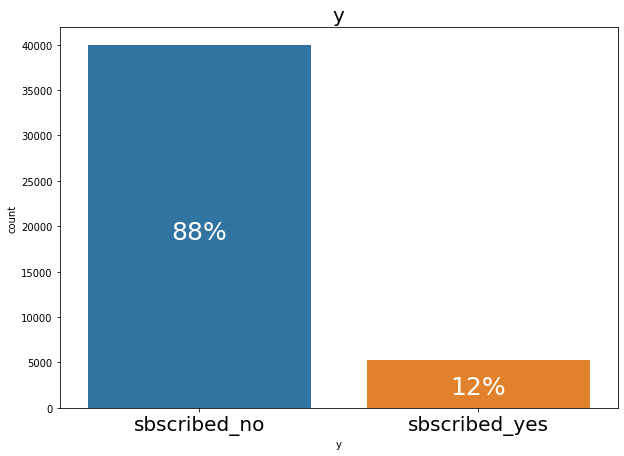

In [14]:
#14

plt.figure(figsize=(10,7))
sns.countplot(x="y", data=bank_df)
percentage_y = bank_df['y'].agg('value_counts', normalize=True) * 100
plt.title("y",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

`y`(目的変数)のyes(定期預金をしている)、no(定期預金をしていない)の割合を確認する。:
- 明らかにno(定期預金をしていない)が多い。モデルで学習するときに同じ割合にしないといけない。機械学習モデルでの学習でclass_weightのパラメーターを使ってyesを間違えて予測した時のペナルティーを調整する。

### 3.2 数量データ (`age`,`balance`,`duration`,`campaign`,`previous`)と`y`(定期預金をしているか、していないか)の関係を確認する。

#### 3.2.1 `age`,`balance`,`duration`,`campaign`,`previous`の外れ値をとってヒストグラムで確認

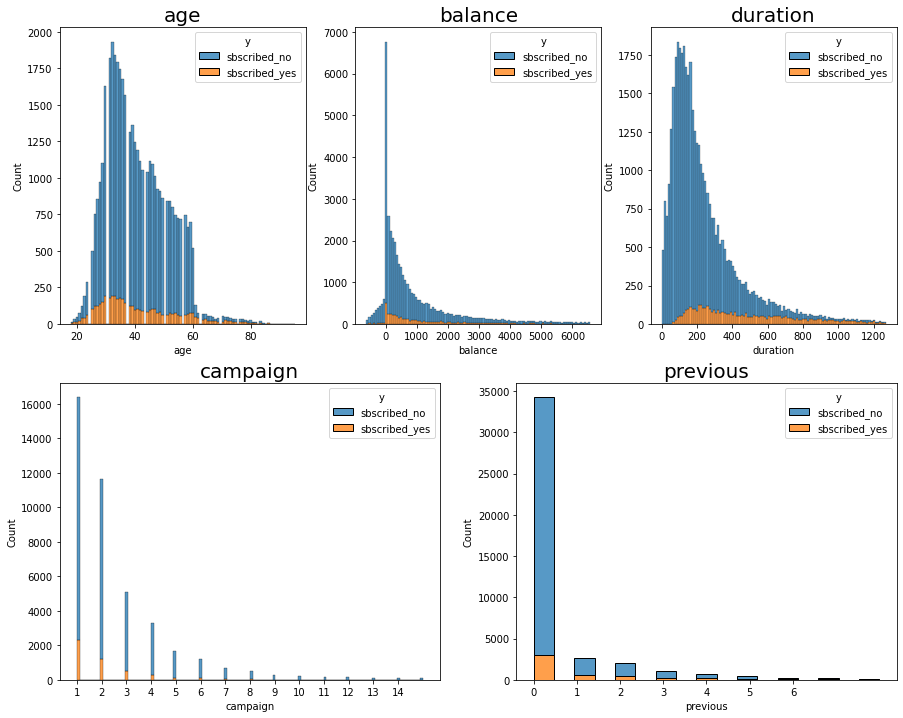

In [15]:
#15

#'balance','duration','campaign','previous'の外れ値をとってヒストグラムで確認

bank_hist_df = bank_df.copy()
q_balance = bank_hist_df.balance.quantile(0.96)
q_balance_low = bank_hist_df.balance.quantile(0.01)
q_duration = bank_hist_df.duration.quantile(0.99)
q_campaign = bank_hist_df.campaign.quantile(0.99)
q_previous = bank_hist_df.previous.quantile(0.99)

bank_hist_df_outlayer_removed = bank_hist_df[(bank_hist_df['balance']<q_balance)&(bank_hist_df['balance']>q_balance_low)&(bank_hist_df['duration']<q_duration)&\
                                                  (bank_hist_df['campaign']<q_campaign)&(bank_hist_df['previous']<q_previous)]
continuous_columns = ['age','balance','duration','campaign','previous']
fig = plt.figure(figsize=(15,12))
for i,column in enumerate(continuous_columns):
    if column == 'age' or column == 'balance' or column == 'duration':
        #bins = 90
        bins = 40
        ax = fig.add_subplot(2, 3, i + 1)
        align = 'mid'
        ran=None
    elif column == 'campaign':
        bins = 14
        ax = fig.add_subplot(2, 2, i )
        align = 'left'
        ran=(1,15)
        plt.xticks(np.arange(1, 15, step=1))
    else:
        bins = 7
        ax = fig.add_subplot(2, 2, i )
        align = 'left'
        ran=(0,7)
        plt.xticks(np.arange(0,7, step=1))
    ax.set_title(column,fontsize =20) 
    sns.histplot(x=column, hue="y", data=bank_hist_df_outlayer_removed, multiple="stack", ax=ax)
plt.show()

`balance`,`duration`,`campaign`,`previous`の外れ値をとってヒストグラムで確認
- `age`は60以上になると顧客の人数はだいぶ減るが、定期預金をしている顧客の割合は高いと思われる
- `duration`も800以上になると顧客の人数はだいぶ減るが、定期預金をしている顧客の割合は高いと思われる
- `balance`を見ると、4000以上の顧客はほとんど定期預金をしていないように見える。残高が多い顧客は定期預金をする必要と思われる。
- `previous`は明らかに0が多い。0と0以外に分けて定期預金をしている顧客の割合を確認してみる。

#### 3.2.2 `age`と`previous`をグループで分けて定期預金してる人の割合を確認す
- `age`は20代、30代、40代、50代、60代に分ける。
- `previous`は0と0以外に分ける。

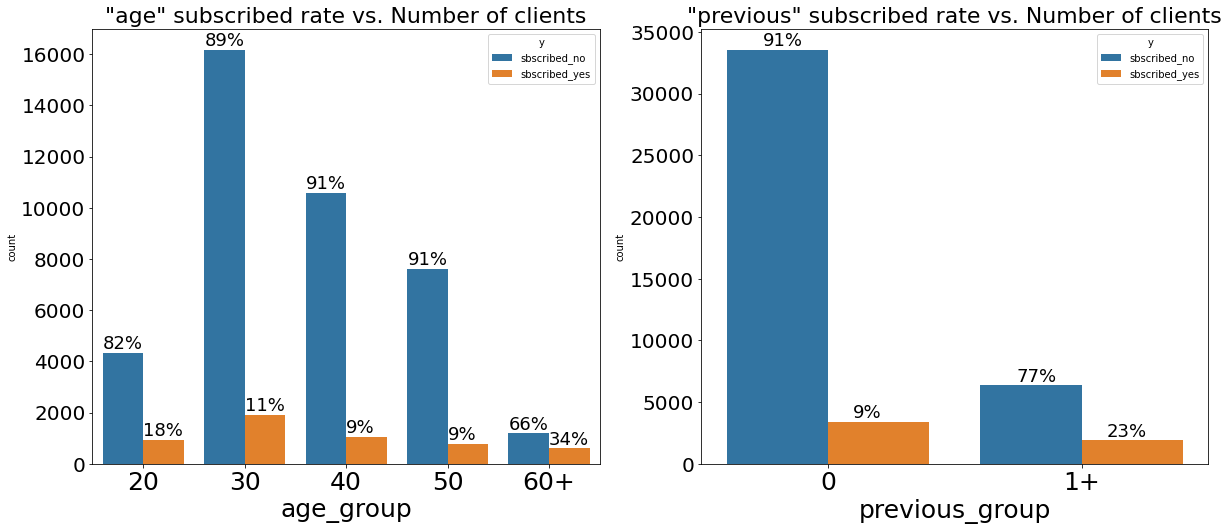

In [16]:
#16

#age group
lst = [bank_df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = '20'
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = '30'
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = '40'
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = '50'
    column.loc[column["age"] >= 60, 'age_group'] = '60+'

age_group_y_pct = pd.crosstab(bank_df['y'],bank_df['age_group']).apply(lambda x: x/x.sum() * 100)
age_group_y_pct = age_group_y_pct.transpose() 

age_group_num_or_sum_df = pd.DataFrame()
age_group_num_or_sum_df = pd.crosstab(bank_df['age_group'], bank_df['y']).reindex(index=['20', '30', '40', '50', '60+'])

#Previous group
lst_2 = [bank_df]
for column in lst_2:
    column.loc[column["previous"] == 0,  'previous_group'] = "0"
    column.loc[column["previous"] >= 1, 'previous_group'] = "1+"
    
previous_group_y_pct = pd.crosstab(bank_df['y'],bank_df['previous_group']).apply(lambda x: x/x.sum() * 100)
previous_group_y_pct = previous_group_y_pct.transpose() 

previous_group_num_or_sum_df = pd.DataFrame()
previous_group_num_or_sum_df = pd.crosstab(bank_df['previous_group'], bank_df['y']).reindex(index=["0", "1+"])

#graph
order_list = ['20', '30', '40', '50', '60+']
fig = plt.figure(figsize=(20,8))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_xlabel('age Group',fontsize=25, y=0.5)
ax_1.tick_params(axis='x', labelsize=25)
ax_1.tick_params(axis='y', labelsize=20)
ax_1.set_title('"age" subscribed rate vs. Number of clients',fontsize =22)
sns.countplot(x="age_group", hue="y", data=bank_df, order=order_list, ax=ax_1)
for i,age_group_group in enumerate(age_group_num_or_sum_df.index):
    plt.text(i, age_group_num_or_sum_df.loc[age_group_group, 'sbscribed_yes'], "{}%".format(round(age_group_y_pct.loc[age_group_group, 'sbscribed_yes'])),  ha='left', va='bottom', size=18)
    plt.text(i, age_group_num_or_sum_df.loc[age_group_group, 'sbscribed_no'], "{}%".format(round(age_group_y_pct.loc[age_group_group, 'sbscribed_no'])),  ha='right', va='bottom', size=18)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_xlabel('previous Group',fontsize=25, y=0.5)
ax_2.tick_params(axis='x', labelsize=25)
ax_2.tick_params(axis='y', labelsize=20)
ax_2.set_title('"previous" subscribed rate vs. Number of clients',fontsize =22)
sns.countplot(x="previous_group", hue="y", data=bank_df, ax=ax_2)
for i,previous_group_group in  enumerate(previous_group_num_or_sum_df.index):
    plt.text(i + 0.1, previous_group_num_or_sum_df.loc[previous_group_group, 'sbscribed_yes'], "{}%".format(round(previous_group_y_pct.loc[previous_group_group, 'sbscribed_yes'])),  ha='left', va='bottom', size=18)
    plt.text(i - 0.1, previous_group_num_or_sum_df.loc[previous_group_group, 'sbscribed_no'], "{}%".format(round(previous_group_y_pct.loc[previous_group_group, 'sbscribed_no'])),  ha='right', va='bottom', size=18)

plt.show()


`age`と`previous`をグループで分けて定期預金してる人の割合を確認する:
- previous(過去何回このキャンペーンで連絡を取ったか)が0の顧客より人数はかなり少ないが1回以上連絡を取った顧客は定期預金をしている確率は上がる。この作成した特徴量(`previous_group`)を機械学習モデルでも使う
- 人数は少ないが60歳以上の人は定期預金をしている確率は高い。年齢で定期預金をしている確率はさがあるように見える。この作成した特徴量(`age_group`)を機械学習モデルでも使う

#### 3.2.3 `age`,`balance`,`duration`,`campaign`,`previous`をボックスプロットで確認する

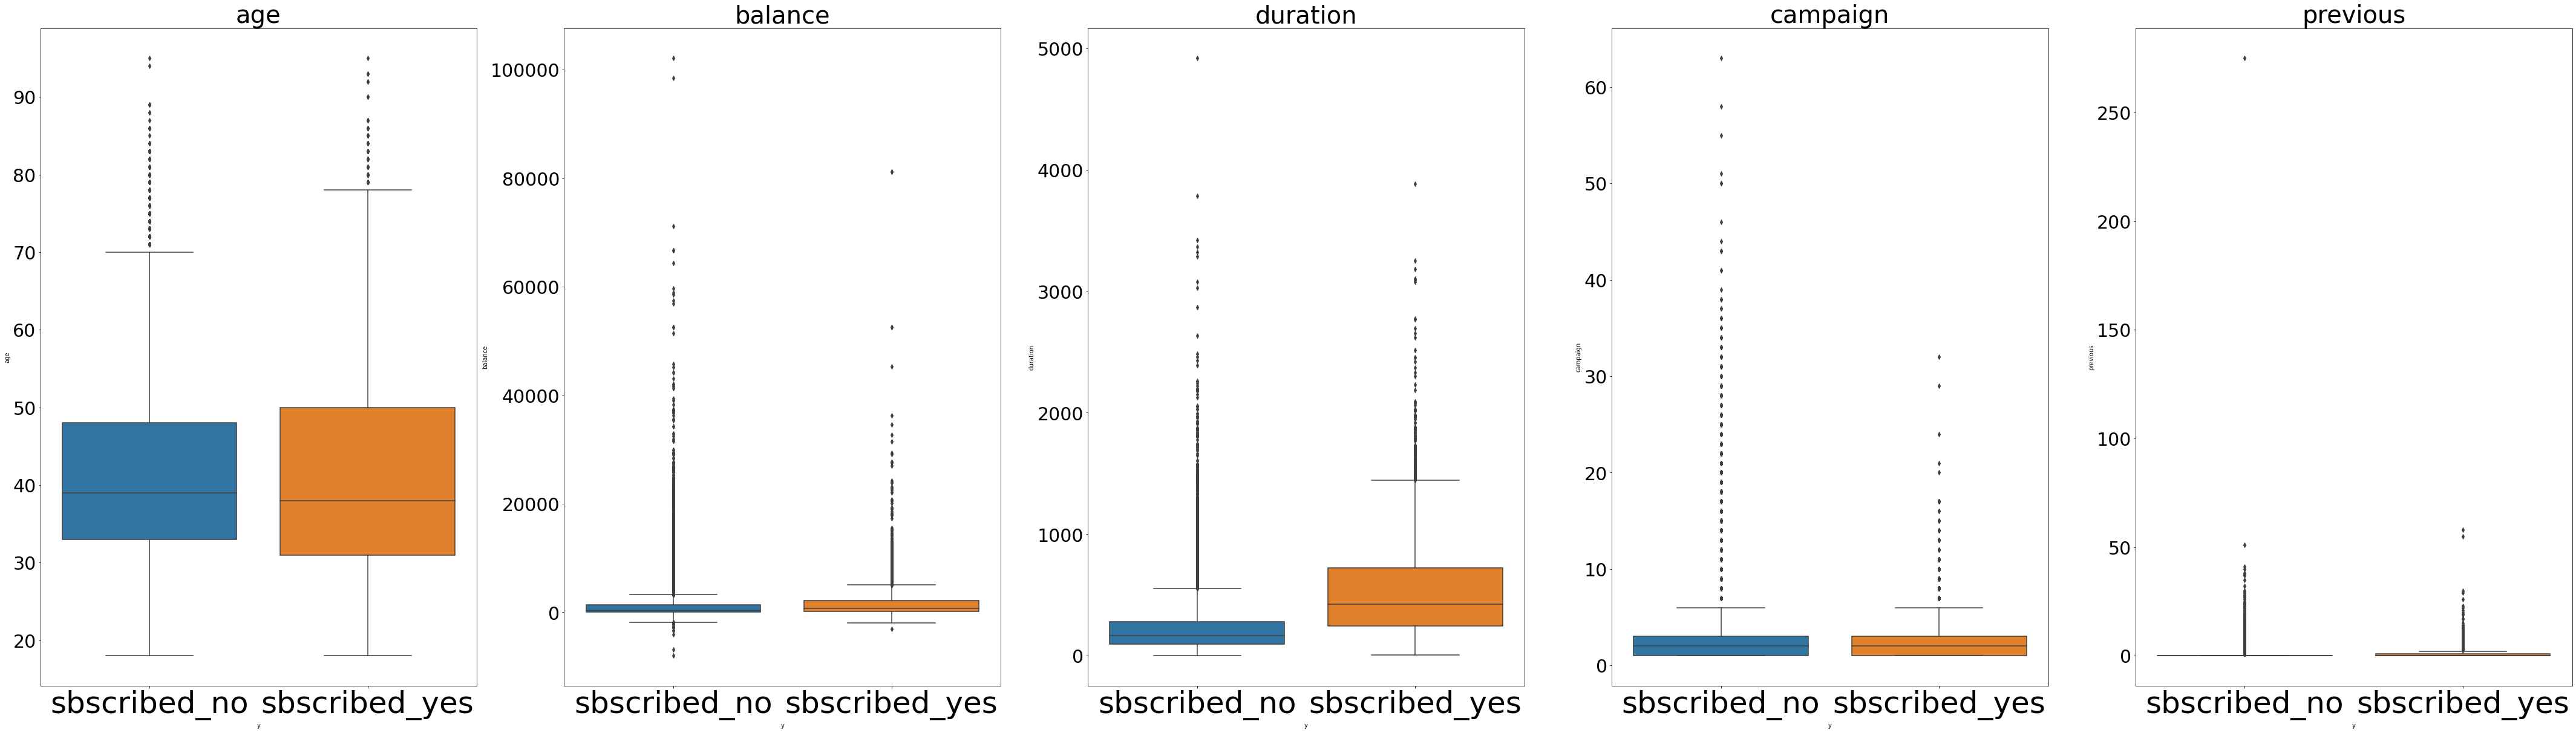

In [17]:
#17

#`age`,`balance`,`duration`,`campaign`,`previous`をボックスプロットで確認する
fig = plt.figure(figsize=(75,20))
for i,column in enumerate(continuous_columns):
    ax = fig.add_subplot(1, 5, i + 1)
    sns.boxplot(x = 'y', y = column, data = bank_df)
    ax.set_title(column,fontsize =40)
    ax.tick_params(axis='x', labelsize=50)
    ax.tick_params(axis='y', labelsize=30)

`age`,`balance`,`duration`,`campaign`,`previous`をボックスプロットで確認する:
- 'age' 以外では外れ値が目立つので外れ値を外してバイオリンプロットを確認してみる

#### 3.2.3 `age`,`balance`,`duration`,`campaign`,`previous`をバイオリンプロットで確認する

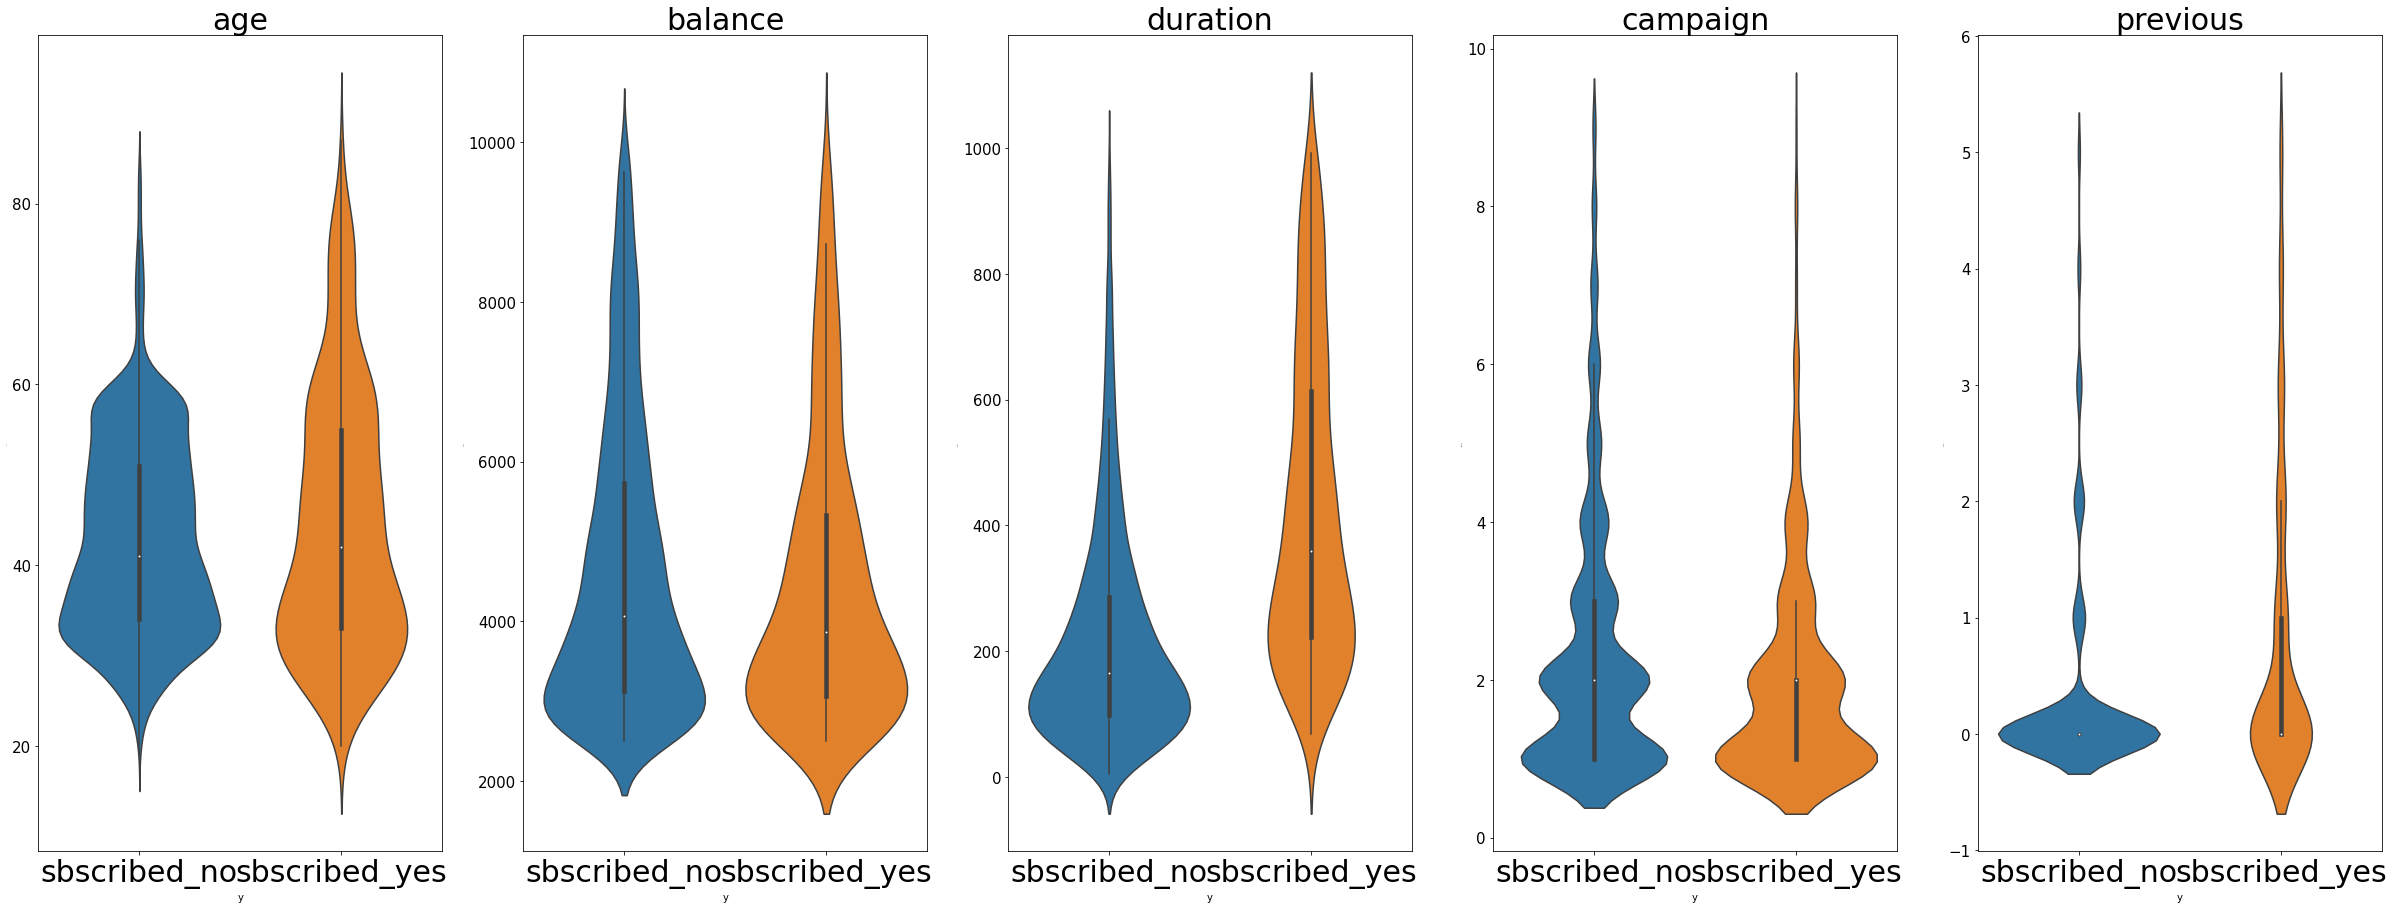

In [18]:
#18

#’age','balance','duration','campaign','previous'をバイオリンプロットで確認する
bank_remove_previous_outl = bank_df[(bank_df['previous'] < 6)&(bank_df['balance'] < 10000)&(bank_df['balance'] > 2500)&(bank_df['campaign'] < 10)&(bank_df['duration'] < 1000)]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(42,15))
ax_list = [ax1, ax2, ax3, ax4, ax5]
for i,column in enumerate(continuous_columns):
 sns.violinplot(data=bank_remove_previous_outl, x='y', y=column, ax=ax_list[i])
 ax_list[i].set_title(column,fontsize =30)
 ax_list[i].set_ylabel(column,fontsize =0)
 ax_list[i].tick_params(axis='x', labelsize=30)
 ax_list[i].tick_params(axis='y', labelsize=15)

`age`,`balance`,`duration`,`campaign`,`previous`をバイオリンプロットで確認する:
- 'duration'(前回このキャンペーンで連絡を取った時に話をした時間)が低い顧客は定期預金をしてない人の割合が多い。大体6分30秒(400以上の顧客は定期預金をしている人の割合が多い
- 'balance','duration','campaign','previous'の外れ値を除去して機械学習モデルで学習、検証する。

#### 3.2.4 `age`,`balance`,`duration`,`campaign`,`previous`を相関図で確認

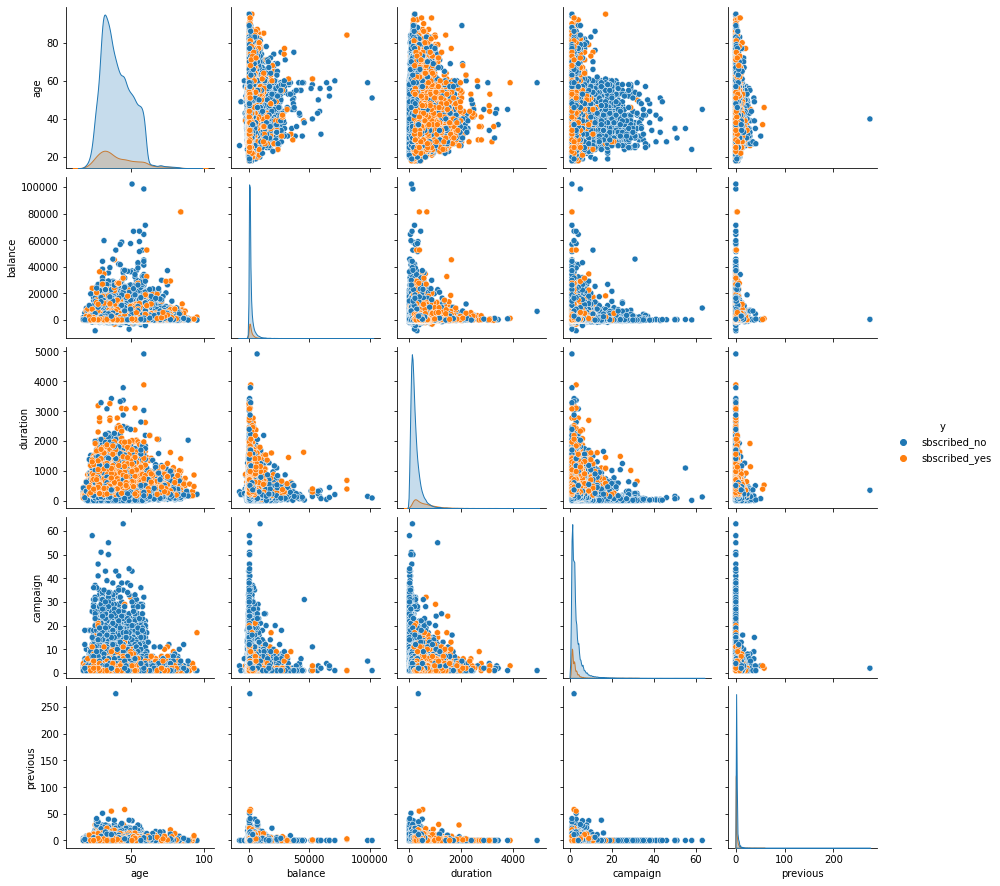

In [19]:
#19

#'age','balance','duration','campaign','previous'の相関図
continuous_columns_plus_y = ['age','balance','duration','campaign','previous','y']
continuous_df = bank_df[continuous_columns_plus_y]
sns.pairplot(continuous_df, hue='y')
plt.show()

`age`,`balance`,`duration`,`campaign`,`previous`を相関図で確認:
- `duration`と`balance`の組み合わせは、ターゲットの位置が固まっている。
- `duration`が高くて`balance`が高い人がいない。残高が高い人は定期預金にあまり興味がないことが分かる。
- `duration`(前回このキャンペーンで連絡を取った時に話をした時間)が大体500(8分)以上`balance`(口座残高)10000以下の顧客が定期預金をしている割合が多いと思われる。
- `campaign`と`balance`の組み合わせを見ると、低所得者にたくさんキャンペーンをしているけど定期預金をしている人がいない。

#### 3.2.5 `age_group`と`campaign_group`と`y`(定期預金をしているか、していないか)の関係を確認する

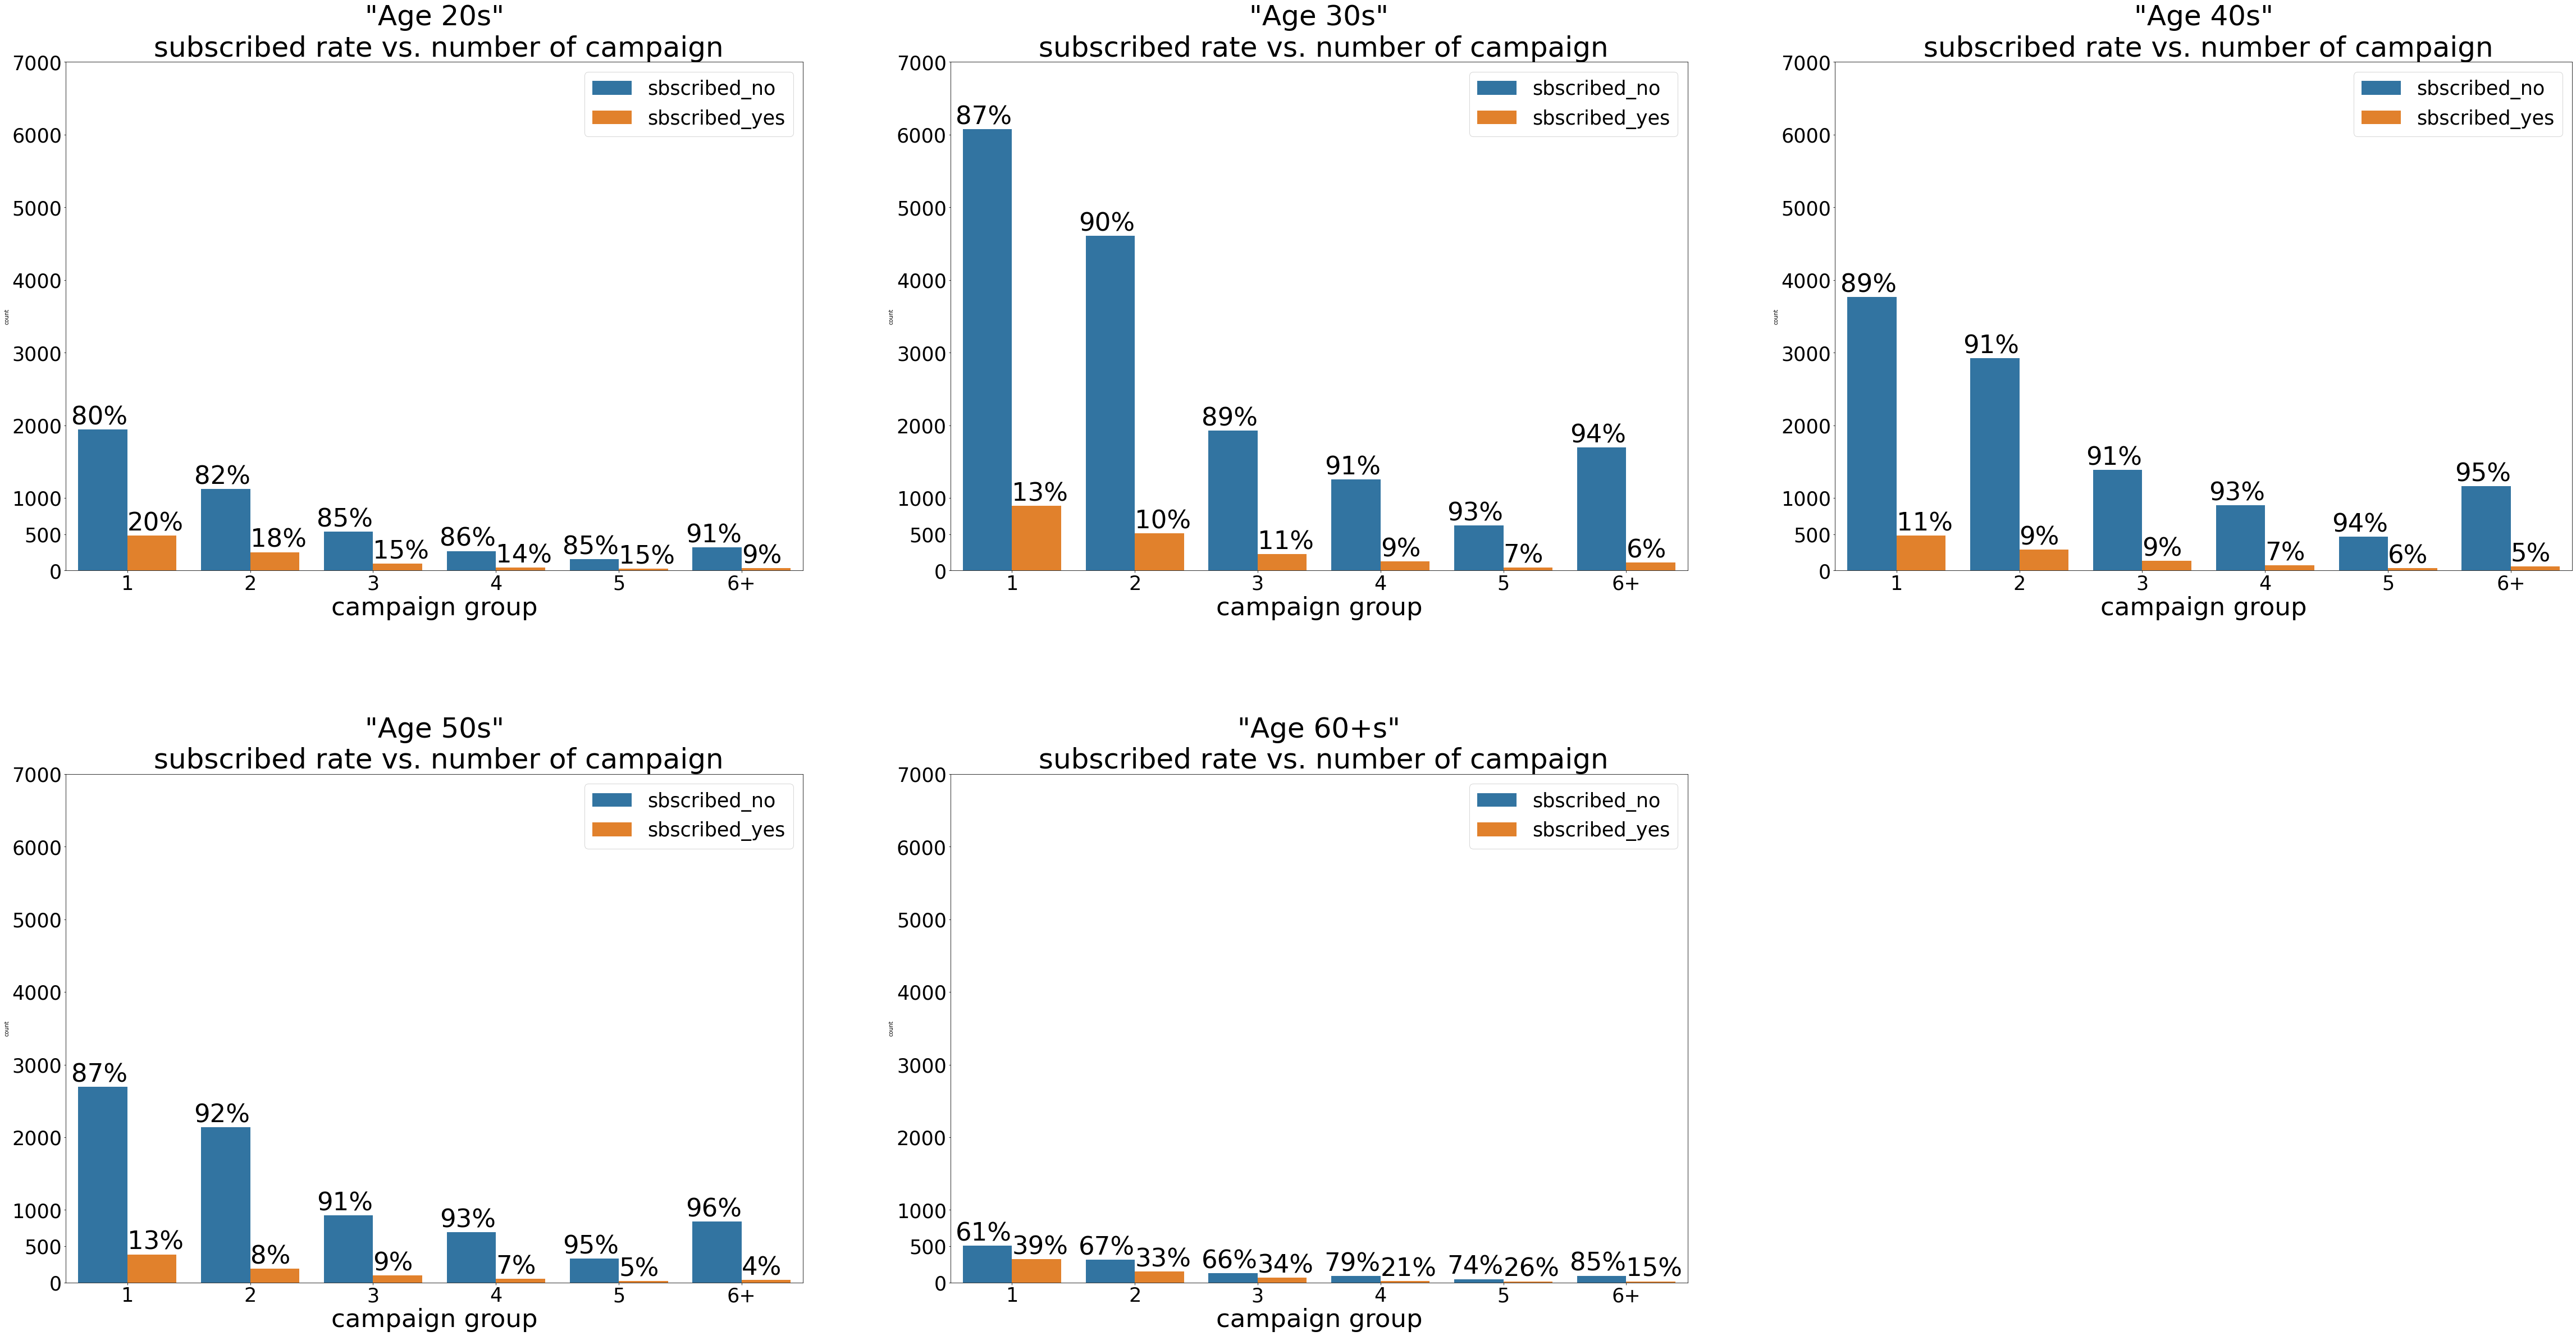

In [20]:
#20

#世代別のcampaignの回数と`y`の関係を確認する
lst_4 = [bank_df]
for column in lst_4:
    column.loc[column["campaign"] == 1, 'campaign_group'] = '1'
    column.loc[column["campaign"] == 2, 'campaign_group'] = '2'
    column.loc[column["campaign"] == 3, 'campaign_group'] = '3'
    column.loc[column["campaign"] == 4, 'campaign_group'] = '4'
    column.loc[column["campaign"] == 5, 'campaign_group'] = '5'
    column.loc[column["campaign"] > 5, 'campaign_group'] = '6+'
fig = plt.figure(figsize=(80,40))
age_list = ['20','30','40','50','60+']
campaign_list = ['1','2','3','4','5','6+']

for i,age in enumerate(age_list):
    bank_age_group = bank_df[bank_df['age_group'] == age]

    campaign_group_y_pct = pd.crosstab(bank_age_group['y'],bank_age_group['campaign_group']).apply(lambda x: x/x.sum() * 100)
    campaign_group_y_pct = campaign_group_y_pct.transpose() 

    campaign_group_num_or_sum_df = pd.DataFrame()
    campaign_group_num_or_sum_df = pd.crosstab(bank_age_group['campaign_group'], bank_age_group['y']).reindex(index=campaign_list)

    ax = fig.add_subplot(2,3, i + 1)

    age_group_df = bank_df[bank_df['age_group'] == age]
    sns.countplot(x="campaign_group", hue="y", data=age_group_df, order=campaign_list, ax=ax)

    ax.set_xlabel('campaign group',fontsize=45, y=0.5)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=35)
    ax.set_title('"Age {}s"\n subscribed rate vs. number of campaign'.format(age),fontsize =50)
    ax.set_yticks([0,500,1000,2000,3000,4000,5000,6000,7000])
    ax.legend(fontsize=35)
    
    for i,campaign_group in enumerate(campaign_group_num_or_sum_df.index):
        plt.text(i, campaign_group_num_or_sum_df.loc[campaign_group, 'sbscribed_yes'], "{}%".format(round(campaign_group_y_pct.loc[campaign_group, 'sbscribed_yes'])),  ha='left', va='bottom', size=45)
        plt.text(i, campaign_group_num_or_sum_df.loc[campaign_group, 'sbscribed_no'], "{}%".format(round(campaign_group_y_pct.loc[campaign_group, 'sbscribed_no'])),  ha='right', va='bottom', size=45)
plt.subplots_adjust(hspace=0.4)
plt.show()

`age_group`と`campaign_group`と`y`(定期預金をしているか、していないか)の関係を確認する：
- ヒストグラムのグラフで確認した通り60代の顧客の人数はかなり少ないがの定期預金をしている人の割合割が高い。キャンペーンの数を増やしてもあまり下がってはいない。
- 20代の顧客も60代ほどではないが定期預金をしている人の割合割は30代,40代,50代に比べて高い。

#### 3.2.6 `age`,`balance`,`duration`,`campaign`,`previous`の相関係数を確認する

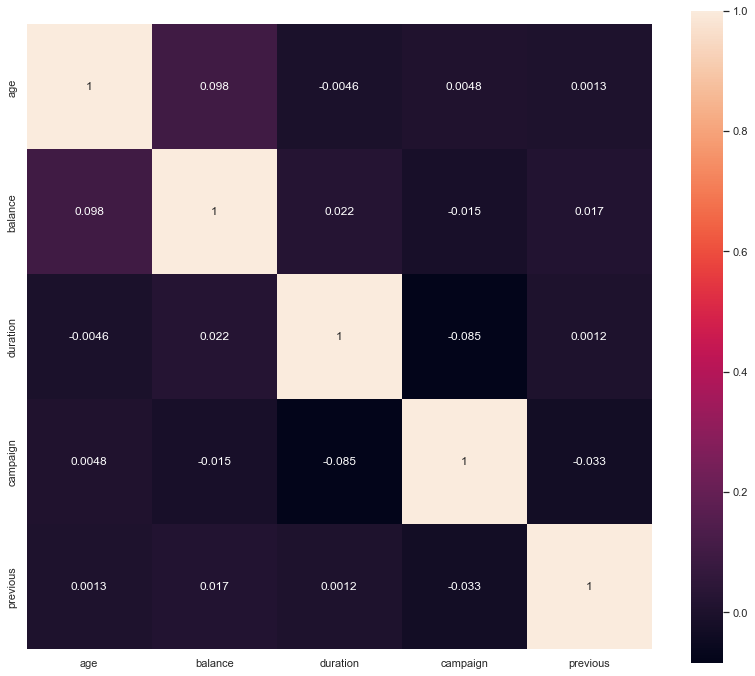

In [21]:
#21

#相関係数図
corr_matrix = bank_df[continuous_columns_plus_y].corr()
sns.set(rc = {'figure.figsize':(14,12)})
sns.heatmap(corr_matrix,
            square=True,
            annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
plt.show()

`age`,`balance`,`duration`,`campaign`,`previous`の相関係数を確認する
- `duration`はターゲットと高い相関係数があることが分かる。

### 3.3 カテゴリーデータ(`job`,`marital`,`education`,`default`,`housing`,`loan`,`contact`,`day`,`month`,`day_of_week`,`bucket_pdays`)と`y`(定期預金をしているか、していないか)の関係を確認する。

#### 3.3.1 棒グラフでカテゴリーデータ(`job`,`marital`,`education`,`default`,`housing`,`loan`,`contact`,`day`,`month`,`day_of_week`,`bucket_pdays`)と`y`(定期預金をしているか、していないか)の関係を確認する。

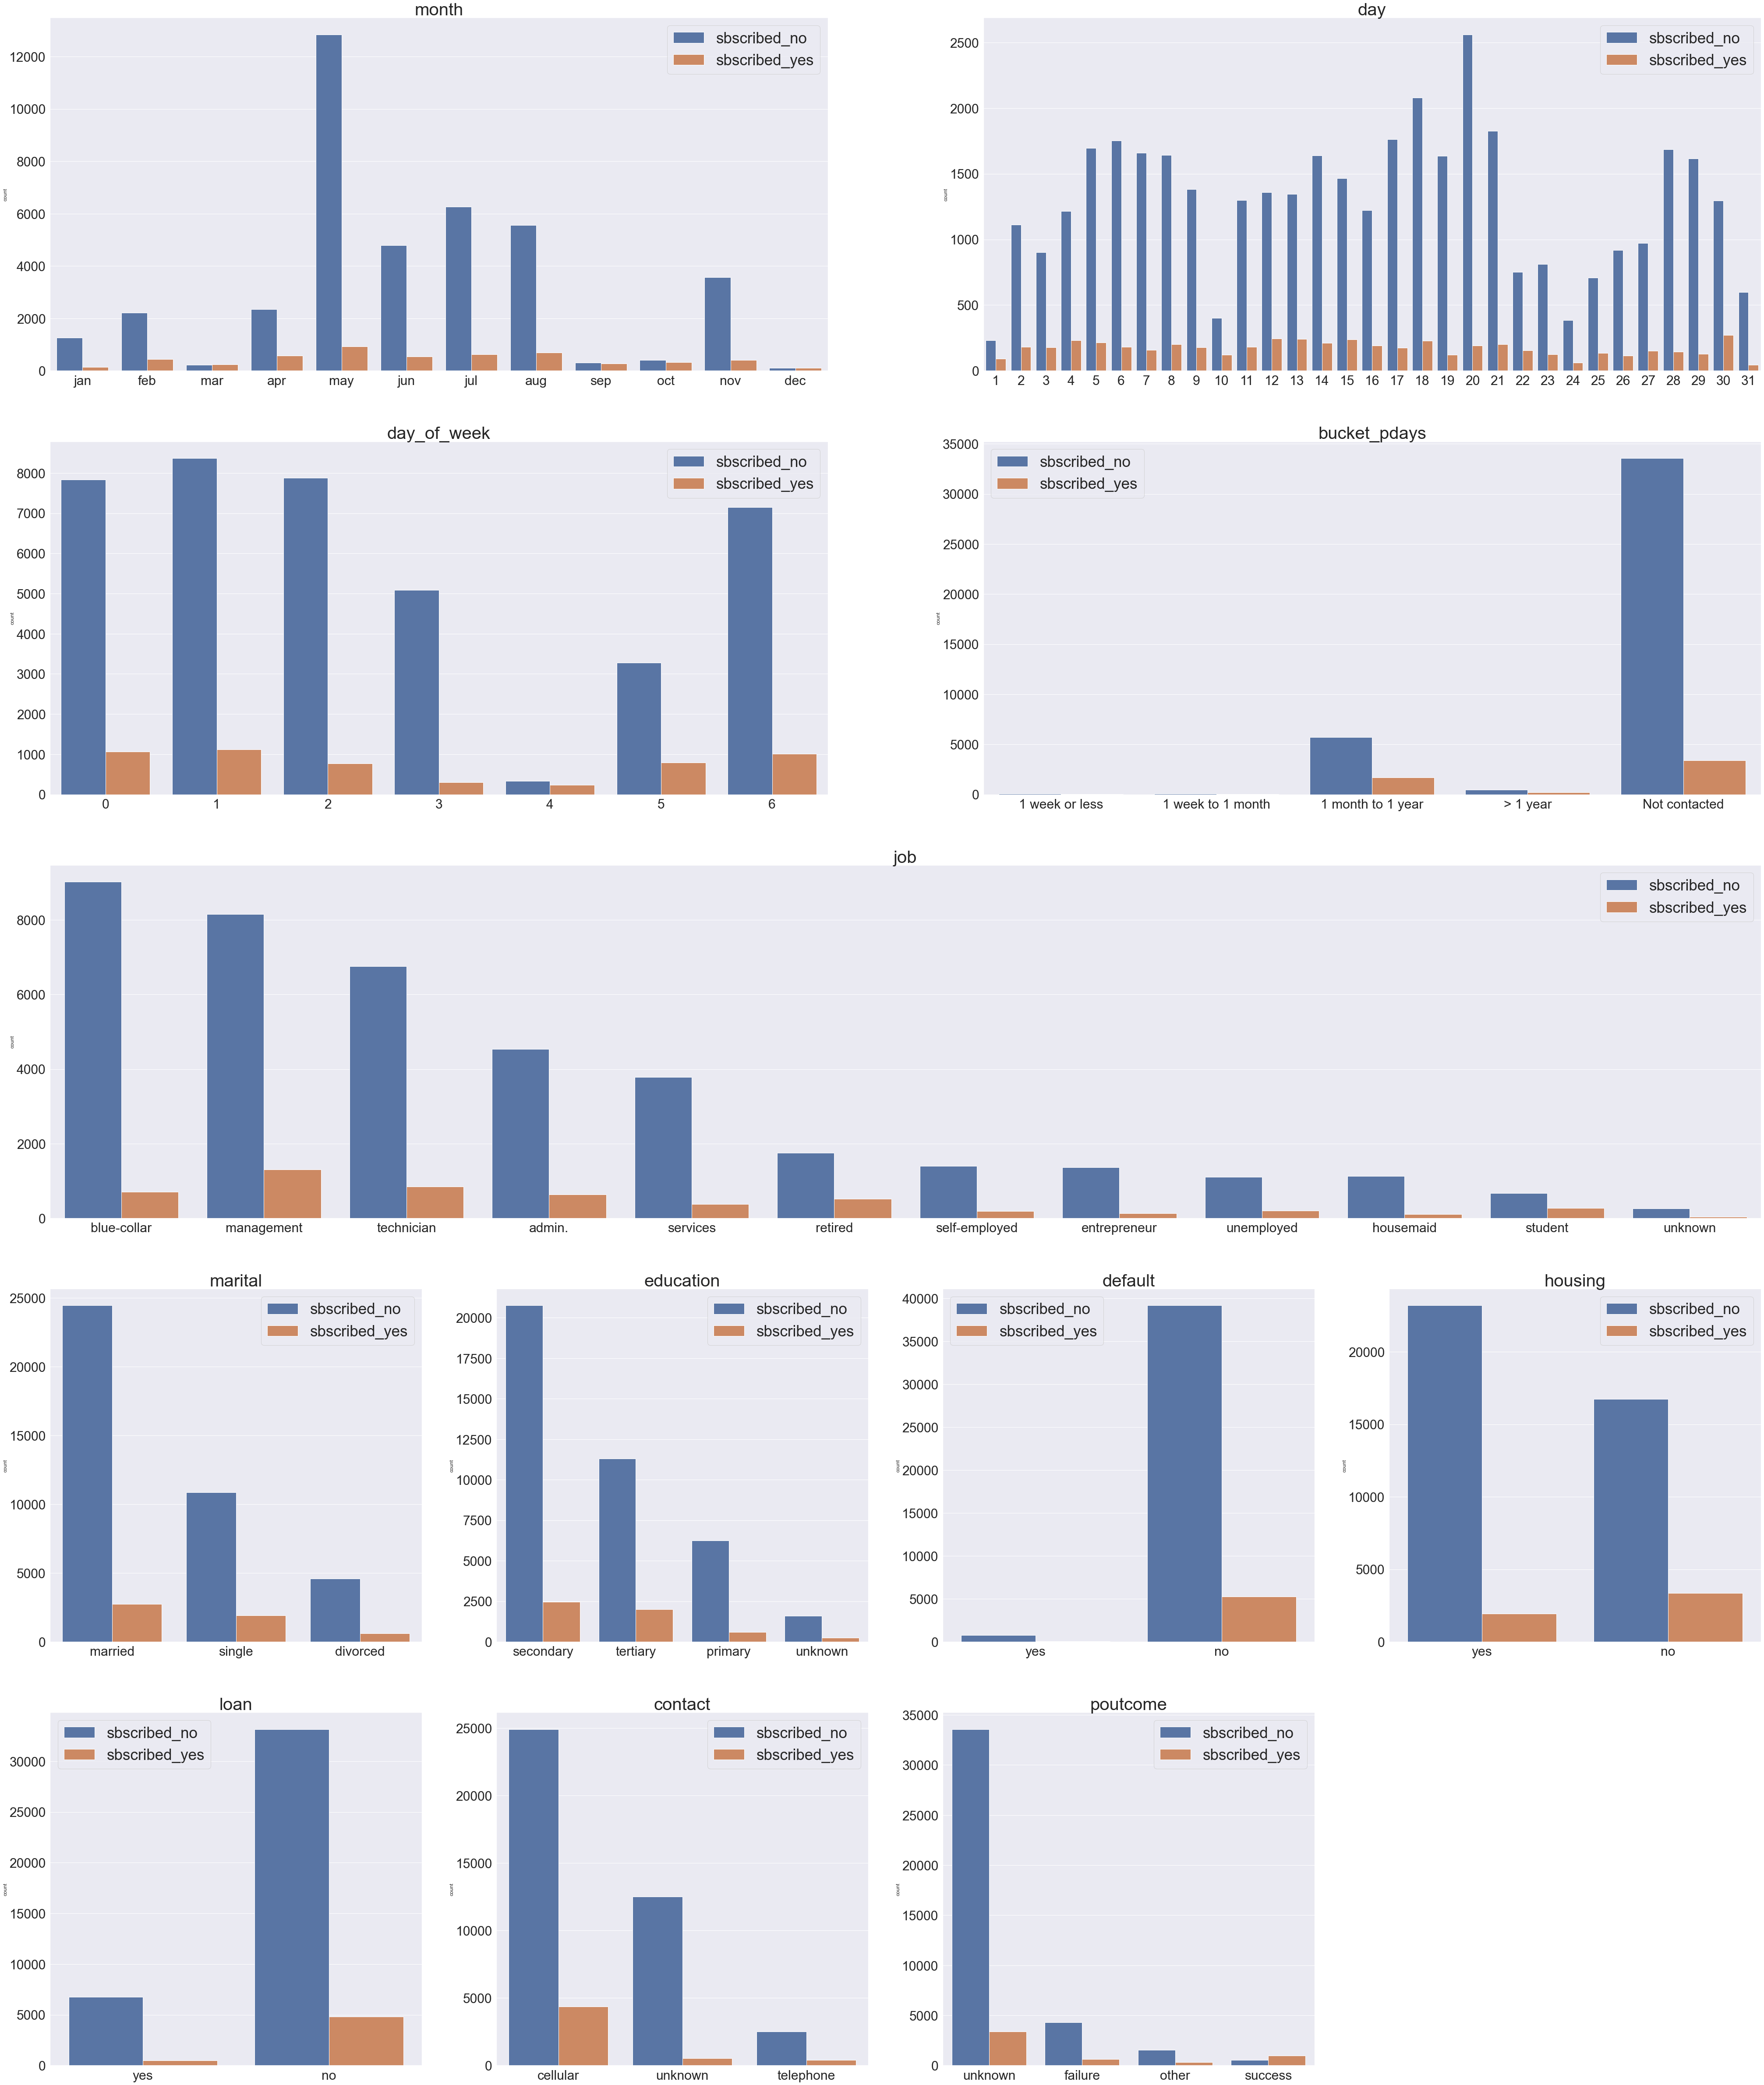

In [22]:
#22

order_day = range(1,32)
order_day_of_week = range(0,7)
order_month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
order_columns = ['month','day','day_of_week','bucket_pdays']
order_bucket_pdays = ['1 week or less','1 week to 1 month','1 month to 1 year','> 1 year','Not contacted']
categorical_columns = ['month','day','day_of_week','bucket_pdays','job','marital','education','default','housing','loan','contact','poutcome']
yes_no_columns = ['default','housing','loan']
fig = plt.figure(figsize=(70,86))
for i,column in enumerate(categorical_columns):
    if column in order_columns:
        if column == 'month':
           order = order_month
        elif column == 'day':
           order = order_day
        elif column == 'day_of_week':
           order = order_day_of_week
        else:
           order = order_bucket_pdays
        ax = fig.add_subplot(5,2, i + 1)
    elif column == 'job':
        ax = fig.add_subplot(5, 1, 3)
        order = bank_df['job'].value_counts().index.tolist()
    else:
        if column in yes_no_columns:
            order = ['yes', 'no']
        else:
            order = bank_df[column].value_counts().index.tolist()
        ax = fig.add_subplot(5, 4, i + 8)
    sns.countplot(x=column, hue="y", data=bank_df, ax=ax, order=order)
    ax.set_title(column,fontsize =40)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('')
    ax.legend(fontsize=35)
plt.show()

棒グラフでカテゴリーデータ(`job`,`marital`,`education`,`default`,`housing`,`loan`,`contact`,`day`,`month`,`day_of_week`,`bucket_pdays`)と`y`(定期預金をしているか、していないか)の関係を確認する。
- `housing`(住宅ローンの有無)はnoの顧客はyesの顧客より定期預金をしてる人の割合が上がり、定期預金をしてない人の割合が下がっていることが分かる。
- 人数は少ないが`month`のいくつかの月で定期預金をしている顧客の割合が高そうなので折れ線グラフで確認する。

#### 3.3.2 住宅ローン(`housing`)と個人ローン(`loan`)の有無を組み合わせてカテゴリーで分けて定期預金をしている人の割合を比べる。

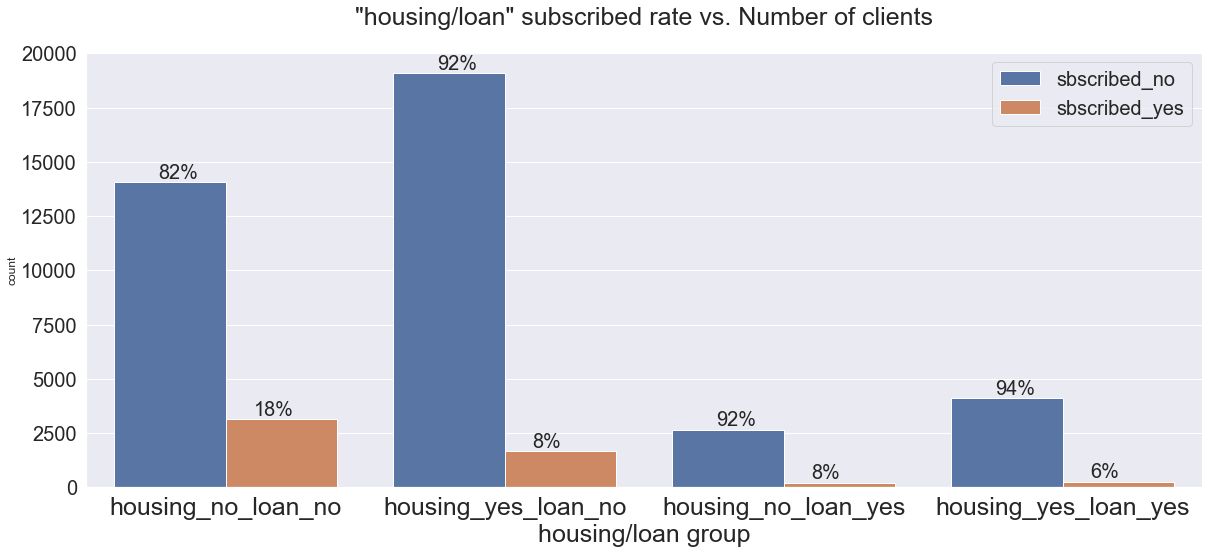

In [23]:
#23

lst = [bank_df]
for column in lst:
    column.loc[(column["housing"] == 'no') & (column["loan"] == 'no'), 'housing_and_loan'] = 'housing_no_loan_no'
    column.loc[(column["housing"] == 'yes') & (column["loan"] == 'no'), 'housing_and_loan'] = 'housing_yes_loan_no'
    column.loc[(column["housing"] == 'no') & (column["loan"] == 'yes'), 'housing_and_loan'] = 'housing_no_loan_yes'
    column.loc[(column["housing"] == 'yes') & (column["loan"] == 'yes'), 'housing_and_loan'] = 'housing_yes_loan_yes'

count_housing_loan_y_pct = pd.crosstab(bank_df['y'],bank_df['housing_and_loan']).apply(lambda x: x/x.sum() * 100)
count_housing_loan_y_pct = count_housing_loan_y_pct.transpose()

housing_loan_num_or_sum_df = pd.DataFrame()
housing_loan_num_or_sum_df = pd.crosstab(bank_df['housing_and_loan'], bank_df['y']).reindex(index=['housing_no_loan_no', 'housing_yes_loan_no', 'housing_no_loan_yes', 'housing_yes_loan_yes'])

order_housing_loan = housing_loan_num_or_sum_df.index.tolist()
plt.figure(figsize=(20,8))
sns.countplot(x="housing_and_loan", hue="y", data=bank_df, order=order_housing_loan)
plt.xlabel('housing/loan group',fontsize=25, y=-1.5)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=20)
plt.title('"housing/loan" subscribed rate vs. Number of clients',fontsize =25, y= 1.05)
plt.legend(fontsize=20)
for i,housing_loan_group in enumerate(housing_loan_num_or_sum_df.index):
    plt.text(i + 0.1, housing_loan_num_or_sum_df.loc[housing_loan_group, 'sbscribed_yes'], "{}%".format(round(count_housing_loan_y_pct.loc[housing_loan_group, 'sbscribed_yes'])),  ha='left', va='bottom', size=20)
    plt.text(i - 0.1, housing_loan_num_or_sum_df.loc[housing_loan_group, 'sbscribed_no'], "{}%".format(round(count_housing_loan_y_pct.loc[housing_loan_group, 'sbscribed_no'])),  ha='right', va='bottom', size=20)

plt.show()

住宅ローン(`housing`)と個人ローン(`loan`)の有無を組み合わせてカテゴリーで分けて定期預金をしている人の割合を比べる。:
- 住宅ローン(`housing`)も個人ローン(`loan`)も無い人は定期預金をしている人の顧客の割合は高い。ローンの有無は定期預金に関係してくるのでこの作成した特徴量(`housing_and_loan`)も機械学習モデルで使う。

#### 3.3.3 `age`と`job`を組み合わせて`y`(定期預金をしているか、していないか)との関係を確認する。

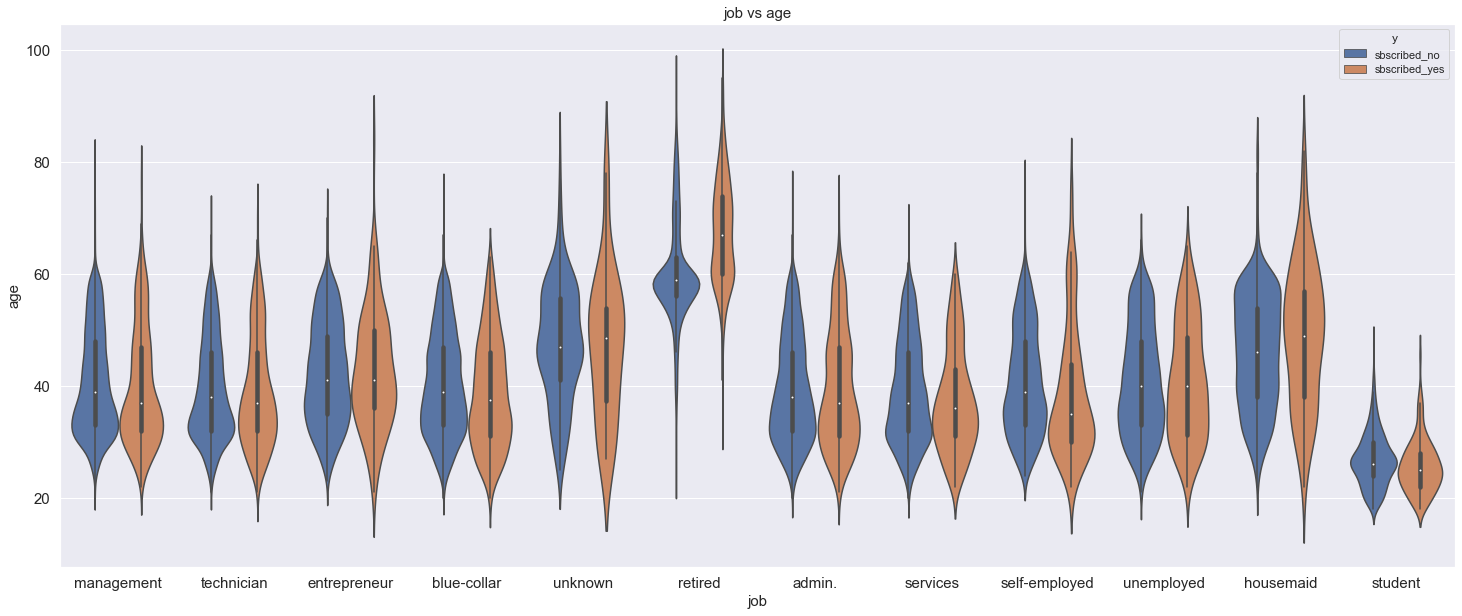

In [24]:
#24

bank_remove_duration_outl = bank_df[bank_df['duration'] < 1000]
plt.figure(figsize=(25,10))
sns.violinplot(x='job', y='age', data=bank_df, hue='y')
plt.title('job vs age',fontsize =15)
plt.xlabel('job',fontsize =15)
plt.ylabel('age',fontsize =15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

`age`と`job`を組み合わせて`y`(定期預金をしているか、していないか)との関係を確認する。:
リタイアしていて60歳以上の顧客は定期預金をしている割合が高い

#### 3.3.4 全てのカテゴリーデータの相関を確認する。

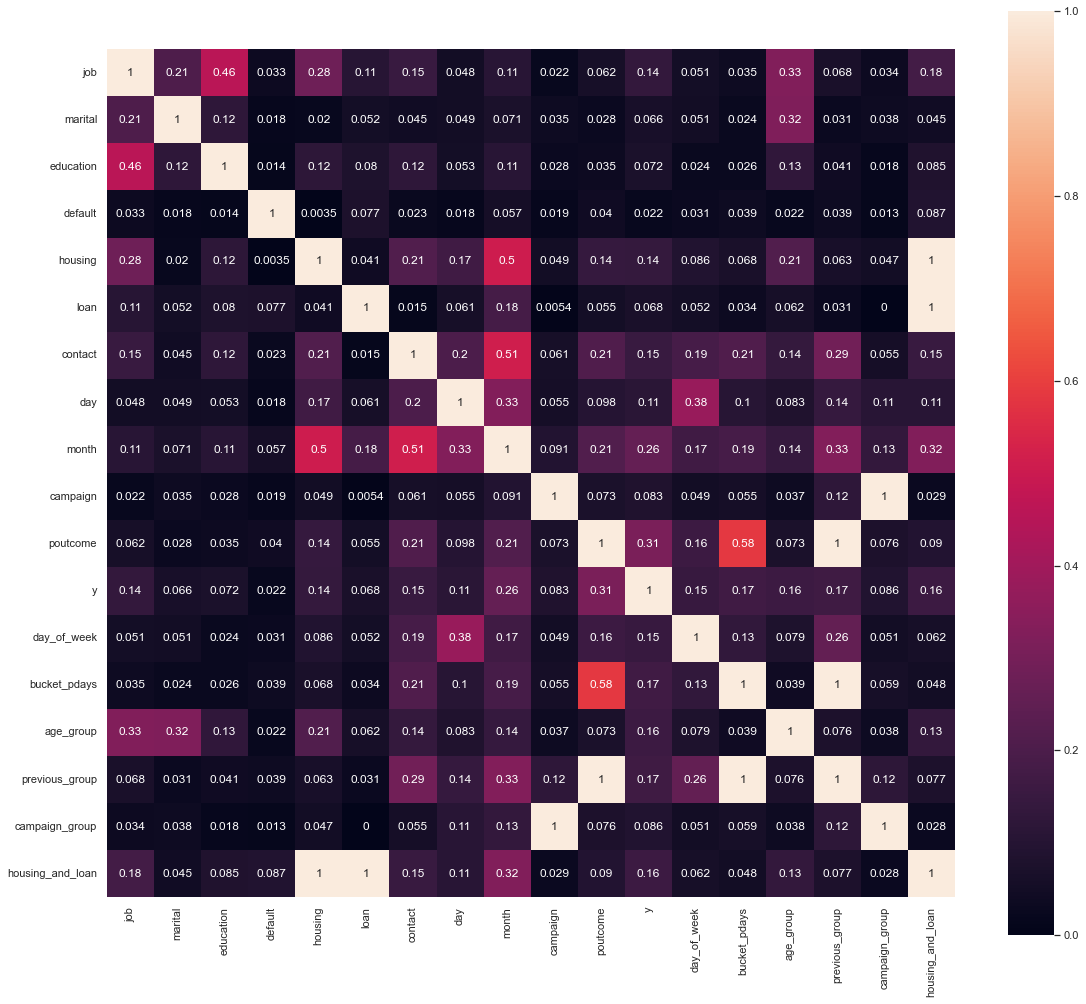

In [25]:
#25

#相関係数図
continuous_columns = ['age','balance','duration','previous']
bank_categorical = bank_df.drop(continuous_columns,axis=1)

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

values_list = []

for columns_1 in bank_categorical.columns:
    values_list_each_row = []
    for columns_2 in bank_categorical.columns:
        confusion_matrix = pd.crosstab(bank_df[columns_1], bank_df[columns_2])
        corr_value = cramers_v(confusion_matrix.values)
        values_list_each_row.append(corr_value)
    values_list.append(values_list_each_row)
values_list

index1 = bank_categorical.columns
columns1 = bank_categorical.columns
corr_df = pd.DataFrame(data=values_list, index=index1, columns=columns1)

sns.set(rc = {'figure.figsize':(19,17)})
sns.heatmap(corr_df,
            square=True,
            annot=True,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)
plt.show()

全てのカテゴリーデータの相関を確認する。
- `month`と`poutcome`は`y`と相関係数がある。
- `job`と`housing`は`y`と少し相関係数があることが分かる。

# 4, 前処理 <a id="4"></a>

### 4.1 機械学習モデルで使うため一部のデータに手を加える

In [26]:
#26

bank_df_future_engineering = bank_df.copy()

In [27]:
#27

#特徴量'y'(ターゲット)を、定期預金をしている=1 定期預金をしてない=0 に変更する
def y_num(y):
    if y == 'sbscribed_yes':
        return 1
    else:
        return 0
bank_df_future_engineering['y'] = bank_df_future_engineering['y'].apply(y_num)

In [28]:
#28

## 特徴量'month'を以下の数値に変更して新しいデータセットに追加する 
# jan =  1
# feb = 2
# and so on ...

def month_to_num(month):
    if month == 'jan':
       return 1
    elif month == 'feb':
       return 2
    elif month == 'mar':
       return 3
    elif month == 'apr':
       return 4
    elif month == 'may':
       return 5
    elif month == 'jun':
       return 6
    elif month == 'jul':
       return 7
    elif month == 'aug':
       return 8
    elif month == 'sep':
       return 9
    elif month == 'oct':
       return 10
    elif month == 'nov':
       return 11
    else:
       return 12

bank_df_future_engineering['month'] = bank_df_future_engineering['month'].apply(month_to_num)

In [29]:
#29

# カテゴリー変数をダミー変数に変えて新しいデータセットに追加する


bank_df_future_engineering = pd.get_dummies(bank_df_future_engineering)

### 4.2 データをトレインセットと検証セットとテストセットに分ける。

In [30]:
#30

from sklearn.model_selection import train_test_split
X, y = bank_df_future_engineering.drop('y',axis=1), bank_df_future_engineering['y']
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0)

### 4.3 トレインセットの目的変数(`y`)の割合を均一にする。
- 0(定期預金をしてない)の割合が明らかに多いのでSMOTEを使い少数派の要素を合成することでサンプリング数を増加させて0(定期預金をしてない)と1(定期預金をしている)の割合を均一にする。
そうしないとほとんど0(定期預金をしてない)を予測するモデルになってしまう。1(定期預金をしている)を当てるモデルを作りたい

In [31]:
#31

#y_trainの割合の確認
y_train.value_counts()

0    22496
1     2935
Name: y, dtype: int64

In [32]:
#32

#SMOTEを使い少数派の要素を合成することでサンプリング数を増加させる。
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [33]:
#33

#再度y_trainの割合の確認

y_train_sm.value_counts()

0    22496
1    22496
Name: y, dtype: int64

### 4.4 トレインセットの`balance`,`duration`,`campaign`,`previous`の外れ値を除去

In [34]:
#34

#トレインセット記述統計量を確認

X_train_sm[['balance','duration','campaign','previous']].describe()

,balance,duration,campaign,previous
count,44992.000000,44992.000000,44992.000000,44992.000000
mean,1574.966394,377.314678,2.333015,0.705103
std,3271.253122,344.077727,2.541564,2.282933
min,-8019.000000,0.000000,1.000000,0.000000
25%,125.000000,143.000000,1.000000,0.000000
50%,556.000000,259.000000,2.000000,0.000000
75%,1746.000000,504.000000,3.000000,1.000000
max,102127.000000,4918.000000,58.000000,275.000000


In [35]:
#35

#外れ値を除去

q_balance = X_train_sm.balance.quantile(0.95)
q_balance_low = X_train_sm.balance.quantile(0.05)
q_duration = X_train_sm.duration.quantile(0.95)
q_campaign = X_train_sm.campaign.quantile(0.95)
q_previous = X_train_sm.previous.quantile(0.95)

X_train_sm['y'] =  y_train_sm

X_train_sm_outlier_removed = X_train_sm[(X_train_sm['balance']<q_balance)&(X_train_sm['balance']>q_balance_low)&(X_train_sm['duration']<q_duration)&\
                                                   (X_train_sm['campaign']<q_campaign)&(X_train_sm['previous']<q_previous)]

In [36]:
#36

X_train_sm_outlier_removed[['balance','duration','campaign','previous']].describe()

,balance,duration,campaign,previous
count,33690.000000,33690.000000,33690.000000,33690.000000
mean,1095.342446,330.334788,1.819709,0.373642
std,1341.256352,247.150735,1.063801,0.782891
min,-71.000000,0.000000,1.000000,0.000000
25%,155.000000,144.000000,1.000000,0.000000
50%,553.500000,252.000000,1.000000,0.000000
75%,1525.000000,459.000000,2.000000,0.000000
max,6413.000000,1089.000000,5.000000,3.000000


In [37]:
#37

X_train_fixed, y_train_fixed = X_train_sm_outlier_removed.drop('y', axis=1), X_train_sm_outlier_removed['y']

# 5, 機械学習 <a id="5"></a>

In [38]:
#38

import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import sklearn.metrics as me
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

In [39]:
#39

def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix",  fontsize=18)
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt="d")
 
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_yticklabels(labels, fontsize=18)
 
    ax.set_xlabel("Predicted Label",fontsize=18)
    ax.set_ylabel("True Label",fontsize=18)

def sbscribed_yes_no(y):
    if y == 1:
        return 'sbscribed_yes'
    else:
        return 'sbscribed_no'

labels = ['sbscribed no','sbscribed yes']

### 5.1 ランダムフォレスト

In [40]:
#40

params = {
    'criterion'   : ['gini', 'entropy'],
    'n_estimators': [10, 100, 300, 500, 1000, 1500, 2000],
    'max_depth'   : [3, 5, 7, 9, 11, 15, 20, 30]
}

rf = RandomForestClassifier(class_weight = {0:1, 1:20})
grid_search = GridSearchCV(rf, param_grid=params, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

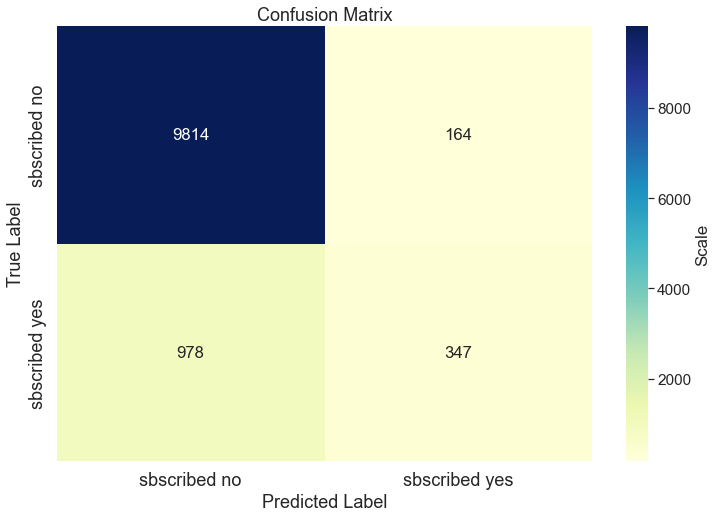

In [41]:
#41

#混同行列
rf_pred = best_rf.predict(X_test)
rf_confusion = me.confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_confusion, labels)

               precision    recall  f1-score   support

 sbscribed_no       0.91      0.98      0.95      9978
sbscribed_yes       0.68      0.26      0.38      1325

     accuracy                           0.90     11303
    macro avg       0.79      0.62      0.66     11303
 weighted avg       0.88      0.90      0.88     11303

AUC : 0.9169062881736048


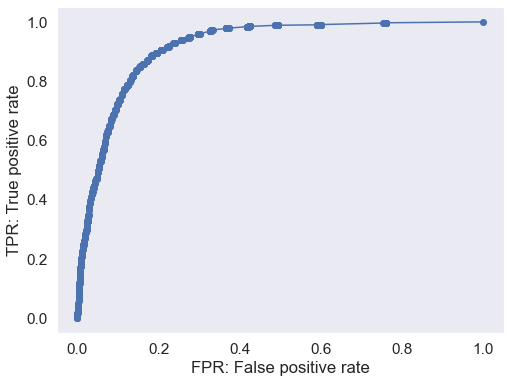

In [42]:
#42

y_test_str = y_test.apply(sbscribed_yes_no)
rf_pred_str = pd.Series(rf_pred).apply(sbscribed_yes_no)
print(classification_report(y_test_str, rf_pred_str))

fpr_all, tpr_all, th_all  = me.roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

rf_2_original_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print('AUC : {}'.format(rf_2_original_auc))

### 5.2 XGBoost 

In [43]:
#43

best_score = 0

for max_depth in range (2, 10, 1):
   for n_estimators in range(60, 220, 40):
      for learning_rate in [0.1, 0.01, 0.05]:
         xgb = XGBClassifier(
           max_depth=max_depth,
           n_estimators=n_estimators,
           learning_rate=learning_rate,
           class_weight='balanced',
           objective= 'binary:logistic',
           nthread=4,
           seed=42,
           verbosity = 0,
           silent=True,
           n_jobs=-1)
       
         xgb.fit(X_train, y_train, sample_weight=compute_sample_weight("balanced", y_train))
       
         scores = cross_val_score(xgb, X_val, y_val, cv=3, scoring='roc_auc')
         score = np.mean(scores)
         if score > best_score:
           best_xgb = xgb

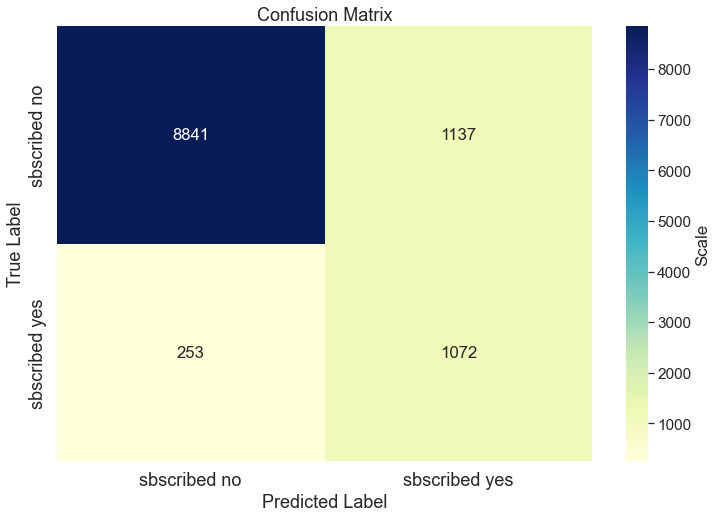

In [44]:
#44

#混同行列
xgb_pred = best_xgb.predict(X_test)
xgb_confusion = me.confusion_matrix(y_test, xgb_pred)
plot_confusion_matrix(xgb_confusion, labels)

               precision    recall  f1-score   support

 sbscribed_no       0.97      0.89      0.93      9978
sbscribed_yes       0.49      0.81      0.61      1325

     accuracy                           0.88     11303
    macro avg       0.73      0.85      0.77     11303
 weighted avg       0.92      0.88      0.89     11303

AUC : 0.9260962797399562


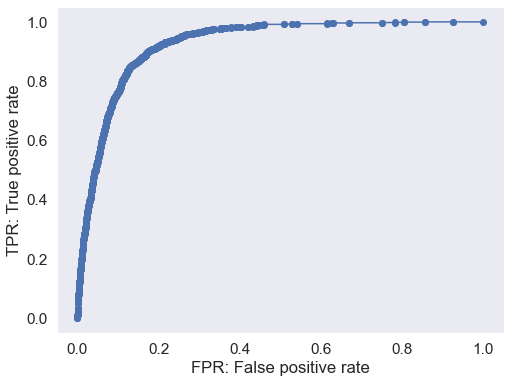

In [45]:
#45

y_test_str = y_test.apply(sbscribed_yes_no)
xgb_pred_str = pd.Series(xgb_pred).apply(sbscribed_yes_no)
print(classification_report(y_test_str, xgb_pred_str))

fpr_all, tpr_all, th_all  = me.roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

xgb_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print('AUC : {}'.format(xgb_auc))

### 5.3 ランダムフォレストで特徴量重要度(feature importances)を抽出する。

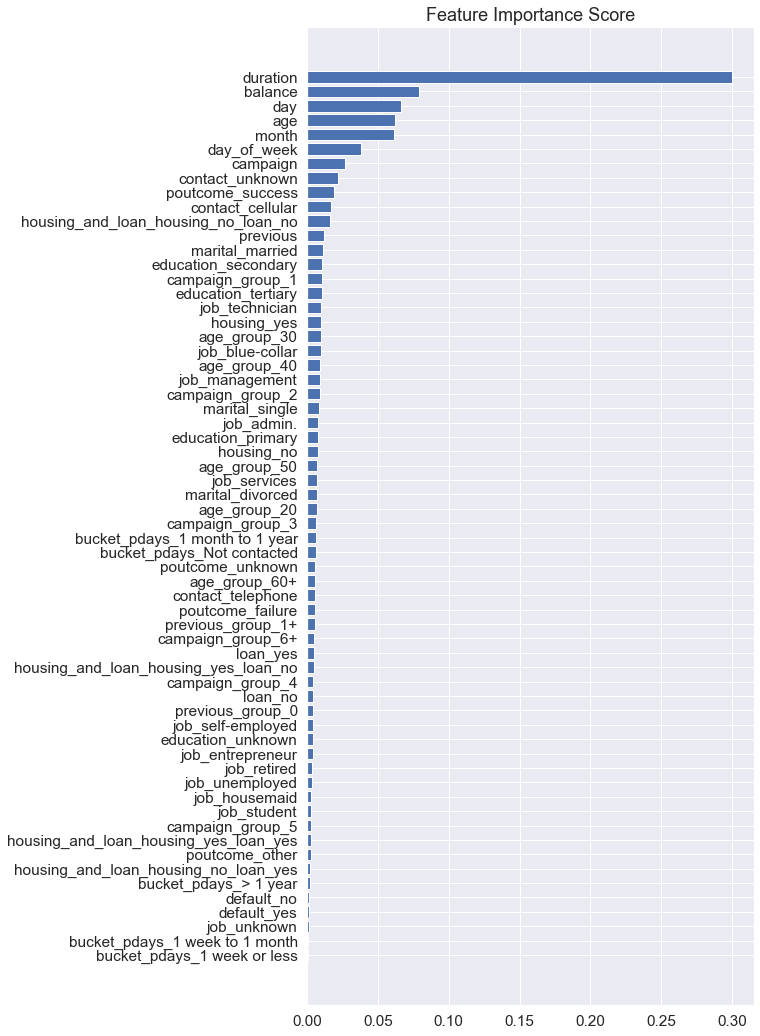

In [46]:
#46

feature_importances_ascending = pd.DataFrame(best_rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)
plt.figure(figsize=(8,18))
plt.title('Feature Importance Score', fontsize=18)
plt.barh(feature_importances_ascending.index, feature_importances_ascending['importance'])
plt.show()

# 6, 結果、まとめ <a id="6"></a>

`y`(定期預金をしているかどうか)に関する考察:
- #14 定期預金をしている顧客が全体の12%と少ない。

`age`(年齢), `job`(仕事)に関する考察:
- #16 20代と60代は定期預金をしている顧客の割合が他の年代に比べて高い。(20代 == 18%, 60代 == 34%)
- #24 仕事をリタイアしていて60代の顧客は定期預金をしている割合が高い。

`duration`(前回このキャンペーンで連絡を取った時に話をした時間)に関する考察:
- #18 `duration`が6分30秒(400)以上の顧客は定期預金をしている割合が高い。


`housing`(住宅ローン)と`loan`(個人ローン)に関する考察:
- #23 住宅ローンも個人ローンもない顧客は定期預金をしている割合が高い。

特徴量エンジニアリング:
- #31, #32, #33 モデルで学習するときに`y`(定期預金をしているかどうか)を同じ割合にしないといけない。SMOTEを使い少数派の要素を合成することでサンプリング数を増加させてno(定期預金をしてない)とyes(定期預金をしている)の割合を均一にした。

機械学習:
- #40, #43 定期預金をしているを当てるモデルにしたいので、機械学習モデルでの学習でclass_weightのパラメーターを使ってyes(定期預金をしている)を間違えて予測した時のペナルティーを調整する。
- #42,#45 機械学習モデルではランダムフォレストとXGBoostは両方ともAUCが0.92以上で高いが、混同行列(#41, #44)を比べるとランダムフォレストはほとんど定期預金をしていない人に予測していて、XGBoostの方がより定期預金をしている人を当てている。XGBoostの方がこのプロジェクトに適していると言える。
- #46 特徴量重要度(feature importances)を確認したところ`duration`が群を抜いて高い。続いて`balance`、`age`、`day`、`month`なども比較的高い

この機械学習モデルを使うメリット:
- こういった機械学習モデルで定期預金をしてくれそうな人を二値分類して確率が高い順に電話をしていけば、人件費を抑えて効率的なマーケティングが可能になる